In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import os
from termcolor import colored
from scipy import stats
import plotly.express as px
from plotly.figure_factory import create_scatterplotmatrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = pd.read_csv("/content/diabetes_data.csv")

In [3]:
X = data.drop('Diabetes', axis=1)
y = data['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)

In [5]:
## Modelo com todas as covariáveis

model1 = smf.glm(formula = 'Diabetes ~ Age + Sex + HighChol + CholCheck + BMI + Smoker + HeartDiseaseorAttack + PhysActivity + Fruits + Veggies + HvyAlcoholConsump + GenHlth + MentHlth + PhysHlth + DiffWalk + Stroke + HighBP', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model1.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

print('Recall modelo 1: ', recall_score(data_test['Diabetes'], y_pred))
print('Precision modelo 1: ', precision_score(data_test['Diabetes'], y_pred))
print('Accuracy modelo 1: ', accuracy_score(data_test['Diabetes'], y_pred))

confusion_matrix(y_test, y_pred)

print(model1.summary())

Recall modelo 1:  0.7696046359472848
Precision modelo 1:  0.7440137345260684
Accuracy modelo 1:  0.7501886080724255
                 Generalized Linear Model Regression Results                  
Dep. Variable:               Diabetes   No. Observations:                49484
Model:                            GLM   Df Residuals:                    49466
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25391.
Date:                Mon, 10 Jun 2024   Deviance:                       50782.
Time:                        12:37:57   Pearson chi2:                 5.11e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3024
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
-----

In [6]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.15

model2 = smf.glm(formula = 'Diabetes ~ Age + HighChol + BMI + HeartDiseaseorAttack + PhysActivity + GenHlth + PhysHlth + DiffWalk + HighBP', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model2.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

print('Recall modelo 2: ', recall_score(data_test['Diabetes'], y_pred))
print('Precision modelo 2: ', precision_score(data_test['Diabetes'], y_pred))
print('Accuracy modelo 2: ', accuracy_score(data_test['Diabetes'], y_pred))

confusion_matrix(y_test, y_pred)

Recall modelo 2:  0.7653986353864847
Precision modelo 2:  0.7407507914970601
Accuracy modelo 2:  0.7465107506601283


array([[7643, 2866],
       [2510, 8189]])

In [7]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.1

model3 = smf.glm(formula = 'Diabetes ~ Age + HighChol + CholCheck + BMI + HeartDiseaseorAttack + PhysActivity + GenHlth + PhysHlth + DiffWalk + Stroke + HighBP', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model3.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

print('Recall modelo 3: ', recall_score(data_test['Diabetes'], y_pred))
print('Precision modelo 3: ', precision_score(data_test['Diabetes'], y_pred))
print('Accuracy modelo 3: ', accuracy_score(data_test['Diabetes'], y_pred))

confusion_matrix(y_test, y_pred)

Recall modelo 3:  0.7678287690438359
Precision modelo 3:  0.7417607223476298
Accuracy modelo 3:  0.7480196152395322


array([[7649, 2860],
       [2484, 8215]])

In [8]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.15 e considerando a alta correlação de GenHlth e PhysHlth

model4 = smf.glm(formula = 'Diabetes ~ Age + HighChol + BMI + HeartDiseaseorAttack + PhysActivity + GenHlth*PhysHlth + DiffWalk + HighBP', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model4.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

print('Recall modelo 4: ', recall_score(data_test['Diabetes'], y_pred))
print('Precision modelo 4: ', precision_score(data_test['Diabetes'], y_pred))
print('Accuracy modelo 4: ', accuracy_score(data_test['Diabetes'], y_pred))

confusion_matrix(y_test, y_pred)

Recall modelo 4:  0.7692307692307693
Precision modelo 4:  0.7402410505486599
Accuracy modelo 4:  0.7474066390041494


array([[7621, 2888],
       [2469, 8230]])

In [9]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.07

model5 = smf.glm(formula = 'Diabetes ~ Age + HighChol + CholCheck + BMI + Smoker + HeartDiseaseorAttack + PhysActivity + Veggies + HvyAlcoholConsump + GenHlth + MentHlth + PhysHlth + DiffWalk + Stroke + HighBP', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model5.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

print('Recall modelo 5: ', recall_score(data_test['Diabetes'], y_pred))
print('Precision modelo 5: ', precision_score(data_test['Diabetes'], y_pred))
print('Accuracy modelo 5: ', accuracy_score(data_test['Diabetes'], y_pred))

confusion_matrix(y_test, y_pred)

Recall modelo 5:  0.7681091690812225
Precision modelo 5:  0.7434412882214583
Accuracy modelo 5:  0.7492927197284044


array([[7673, 2836],
       [2481, 8218]])

In [10]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.07 e considerando a alta correlação de GenHlth e PhysHlth

model6 = smf.glm(formula = 'Diabetes ~ Age + HighChol + CholCheck + BMI + Smoker + HeartDiseaseorAttack + PhysActivity + Veggies + HvyAlcoholConsump + MentHlth + GenHlth*PhysHlth + DiffWalk + Stroke + HighBP', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model6.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

print('Recall modelo 6: ', recall_score(data_test['Diabetes'], y_pred))
print('Precision modelo 6: ', precision_score(data_test['Diabetes'], y_pred))
print('Accuracy modelo 6: ', accuracy_score(data_test['Diabetes'], y_pred))

confusion_matrix(y_test, y_pred)

Recall modelo 6:  0.7731563697541827
Precision modelo 6:  0.7425493716337522
Accuracy modelo 6:  0.7503300641267446


array([[7641, 2868],
       [2427, 8272]])

In [11]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.07 e considerando a alta correlação de GenHlth, PhysHlth e DiffWalk

model8 = smf.glm(formula = 'Diabetes ~ Age + HighChol + CholCheck + BMI + Smoker + HeartDiseaseorAttack + PhysActivity + Veggies + HvyAlcoholConsump + MentHlth + GenHlth*PhysHlth*DiffWalk + Stroke + HighBP', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model8.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

print('Recall modelo 8: ', recall_score(data_test['Diabetes'], y_pred))
print('Precision modelo 8: ', precision_score(data_test['Diabetes'], y_pred))
print('Accuracy modelo 8: ', accuracy_score(data_test['Diabetes'], y_pred))

confusion_matrix(y_test, y_pred)

Recall modelo 8:  0.774558369941116
Precision modelo 8:  0.7413669708355699
Accuracy modelo 8:  0.7499528479818937


array([[7618, 2891],
       [2412, 8287]])

In [12]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.07 e considerando a alta correlação de GenHlth, PhysHlth, DiffWalk e MentHlth

model9 = smf.glm(formula = 'Diabetes ~ Age + HighChol + CholCheck + BMI + Smoker + HeartDiseaseorAttack + PhysActivity + Veggies + HvyAlcoholConsump + MentHlth*GenHlth*PhysHlth*DiffWalk + Stroke + HighBP', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model9.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

print('Recall modelo 9: ', recall_score(data_test['Diabetes'], y_pred))
print('Precision modelo 9: ', precision_score(data_test['Diabetes'], y_pred))
print('Accuracy modelo 9: ', accuracy_score(data_test['Diabetes'], y_pred))

confusion_matrix(y_test, y_pred)

Recall modelo 9:  0.7756799700906627
Precision modelo 9:  0.7413793103448276
Accuracy modelo 9:  0.7503300641267446


array([[7614, 2895],
       [2400, 8299]])

In [13]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.07 e considerando a alta correlação de GenHlth, PhysHlth, DiffWalk, MentHlth e HighBP

model10 = smf.glm(formula = 'Diabetes ~ Age + HighChol + CholCheck + BMI + Smoker + HeartDiseaseorAttack + PhysActivity + Veggies + HvyAlcoholConsump + MentHlth*GenHlth*PhysHlth*DiffWalk*HighBP + Stroke', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model10.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

print('Recall modelo 10: ', recall_score(data_test['Diabetes'], y_pred))
print('Precision modelo 10: ', precision_score(data_test['Diabetes'], y_pred))
print('Accuracy modelo 10: ', accuracy_score(data_test['Diabetes'], y_pred))

confusion_matrix(y_test, y_pred)

Recall modelo 10:  0.7867090382278717
Precision modelo 10:  0.7366532469805707
Accuracy modelo 10:  0.7505186721991701


array([[7500, 3009],
       [2282, 8417]])

In [14]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.07 e considerando a alta correlação de GenHlth, PhysHlth, DiffWalk, MentHlth, HighBP e BMI

model11 = smf.glm(formula = 'Diabetes ~ Age + HighChol + CholCheck + Smoker + HeartDiseaseorAttack + PhysActivity + Veggies + HvyAlcoholConsump +  BMI*MentHlth*GenHlth*PhysHlth*DiffWalk*HighBP + Stroke', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model11.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

print('Recall modelo 11: ', recall_score(data_test['Diabetes'], y_pred))
print('Precision modelo 11: ', precision_score(data_test['Diabetes'], y_pred))
print('Accuracy modelo 11: ', accuracy_score(data_test['Diabetes'], y_pred))

confusion_matrix(y_test, y_pred)

Recall modelo 11:  0.7862417048322273
Precision modelo 11:  0.7375712406839106
Accuracy modelo 11:  0.7510373443983402


array([[7516, 2993],
       [2287, 8412]])

In [4]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.07 e considerando a alta correlação de GenHlth, PhysHlth, DiffWalk, MentHlth, HighBP e HeartDiseaseorAttack

model12 = smf.glm(formula = 'Diabetes ~ Age + HighChol + CholCheck + BMI + Smoker  + PhysActivity + Veggies + HvyAlcoholConsump +  HeartDiseaseorAttack*MentHlth*GenHlth*PhysHlth*DiffWalk*HighBP + Stroke', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model12.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

print('Recall modelo 12: ', recall_score(data_test['Diabetes'], y_pred))
print('Precision modelo 12: ', precision_score(data_test['Diabetes'], y_pred))
print('Accuracy modelo 12: ', accuracy_score(data_test['Diabetes'], y_pred))

confusion_matrix(y_test, y_pred)
print(model12.summary())

Recall modelo 12:  0.7900738386765118
Precision modelo 12:  0.7356191802280045
Accuracy modelo 12:  0.7508487363259148
                 Generalized Linear Model Regression Results                  
Dep. Variable:               Diabetes   No. Observations:                49484
Model:                            GLM   Df Residuals:                    49411
Model Family:                Binomial   Df Model:                           72
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25237.
Date:                Mon, 10 Jun 2024   Deviance:                       50475.
Time:                        12:35:30   Pearson chi2:                 5.05e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3067
Covariance Type:            nonrobust                                         
                                                                     coef    std err       

In [15]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.07 e considerando a alta correlação de GenHlth, PhysHlth, DiffWalk, MentHlth, HighBP e o absoluto de PhysActivity

model13 = smf.glm(formula = 'Diabetes ~ Age + HighChol + CholCheck + BMI + Smoker + Veggies + HvyAlcoholConsump + PhysActivity*HeartDiseaseorAttack*MentHlth*GenHlth*PhysHlth*DiffWalk*HighBP + Stroke', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model13.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

print('Recall modelo 13: ', recall_score(data_test['Diabetes'], y_pred))
print('Precision modelo 13: ', precision_score(data_test['Diabetes'], y_pred))
print('Accuracy modelo 13: ', accuracy_score(data_test['Diabetes'], y_pred))

from sklearn.metrics import f1_score

f1 = f1_score(data_test['Diabetes'], y_pred)
print(f1)
confusion_matrix(y_test, y_pred)

Recall modelo 13:  0.7878306383774184
Precision modelo 13:  0.7365431667249214
Accuracy modelo 13:  0.7508015843078084
0.7613241204895452


array([[7494, 3015],
       [2270, 8429]])

In [16]:
print('AIC do modelo 1: {}'.format(model1.aic))
print('AIC do modelo 2: {}'.format(model2.aic))
print('AIC do modelo 3: {}'.format(model3.aic))
print('AIC do modelo 4: {}'.format(model4.aic))
print('AIC do modelo 5: {}'.format(model5.aic))
print('AIC do modelo 6: {}'.format(model6.aic))
print('AIC do modelo 8: {}'.format(model8.aic))
print('AIC do modelo 9: {}'.format(model9.aic))
print('AIC do modelo 10: {}'.format(model10.aic))
print('AIC do modelo 11: {}'.format(model11.aic))
print('AIC do modelo 12: {}'.format(model12.aic))
print('AIC do modelo 13: {}'.format(model13.aic))

AIC do modelo 1: 50818.02961352166
AIC do modelo 2: 51381.5049052679
AIC do modelo 3: 51135.58023064476
AIC do modelo 4: 51234.155230499135
AIC do modelo 5: 50915.66409161275
AIC do modelo 6: 50774.63664671658
AIC do modelo 8: 50711.164281423466
AIC do modelo 9: 50713.29040443975
AIC do modelo 10: 50640.00613069267
AIC do modelo 11: 50637.427817197
AIC do modelo 12: 50620.817661985
AIC do modelo 13: 50675.68207604068


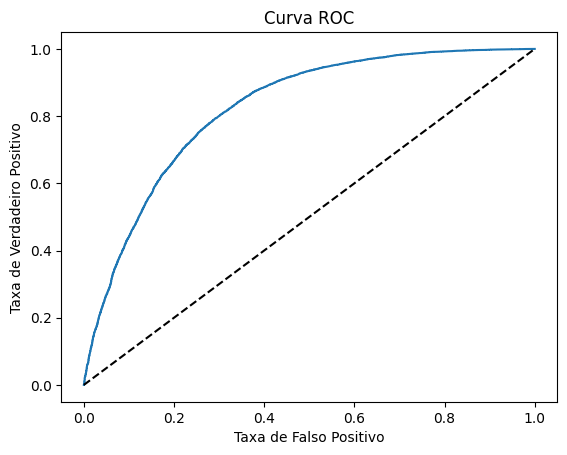

0.8227247540776407


In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = model10.predict(data_test)

fpr10, tpr10, thresholds = roc_curve(data_test['Diabetes'], y_proba)

area10 = roc_auc_score(data_test['Diabetes'], y_proba)

plt.plot(fpr10, tpr10)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.show()

print(area10)

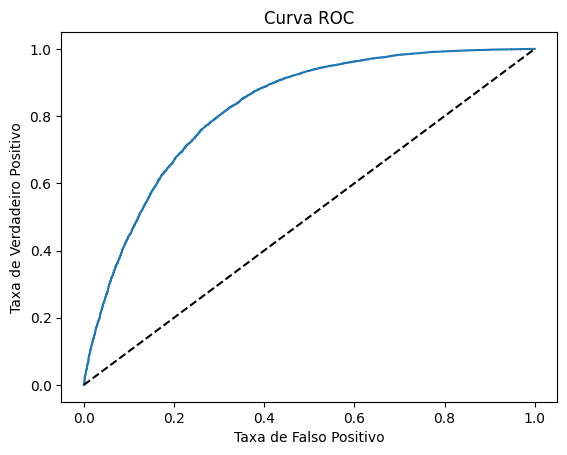

0.8229606042438924


In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = model12.predict(data_test)

fpr12, tpr12, thresholds = roc_curve(data_test['Diabetes'], y_proba)

area12 = roc_auc_score(data_test['Diabetes'], y_proba)

plt.plot(fpr12, tpr12)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.show()

print(area12)

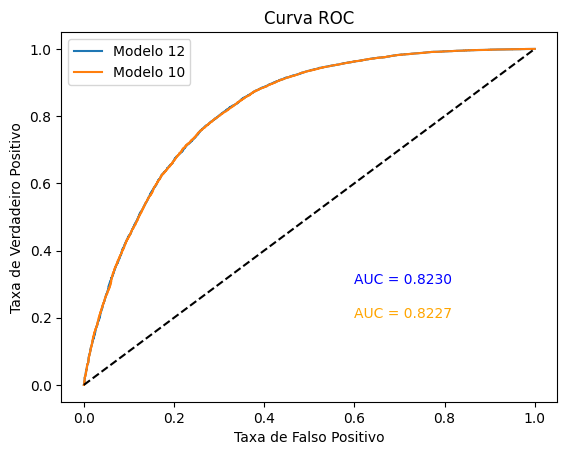

In [19]:
plt.plot(fpr12, tpr12)
plt.plot(fpr10, tpr10)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(['Modelo 12', 'Modelo 10'])
plt.text(0.6, 0.3, 'AUC = %0.4f' % area12, color='blue')
plt.text(0.6, 0.2, 'AUC = %0.4f' % area10, color='orange')

plt.show()